# **X-ray Chest Detection**

In [11]:
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
%matplotlib inline

# importing tf.keras modules
from keras.preprocessing.image import ImageDataGenerator
# from keras.utils import image_dataset_from_directory

print('Dependencies succesfully imported!')

Dependencies succesfully imported!


In [40]:
# getting filepath for each split
train_path = r"dataset/train"
val_path = r"dataset/val"
test_path = r"dataset/test"

seed = 42
shuffle = True

datagen = ImageDataGenerator(
    rescale = 1./255,
)

def augment_data(path, augmenter, batch_size = 32, target_size = (256,256), class_mode = 'binary'):
    return augmenter.flow_from_directory(
        directory = path,
        batch_size = batch_size,
        target_size = target_size,
        class_mode = class_mode,
        seed = seed,
        shuffle = shuffle
    )

# import files using image_dataset_from_directory
train = augment_data(train_path, augmenter = datagen)
val = augment_data(val_path, augmenter = datagen)
test = augment_data(test_path, augmenter = datagen)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [20]:
train.labels

array([0, 0, 0, ..., 1, 1, 1])

In [38]:
# Showing train_ images
def show_sample_img(data, suptitle):
  x, y = data.next()
  fig, ax = plt.subplots(ncols = 5, sharey = True, sharex = True, figsize = (15,10))
  for i in range(5):
    image = x[i]
    label = y[i]
    ax[i].imshow(image)
    if label == 1.0:
      ax[i].title.set_text('PNEUMONIA')
    else:
      ax[i].title.set_text('NORMAL')
  plt.suptitle(f"'{suptitle}' dataset", fontsize = 14)
  plt.tight_layout(rect=[0, 0.7, 1, 0.95])
  plt.show()

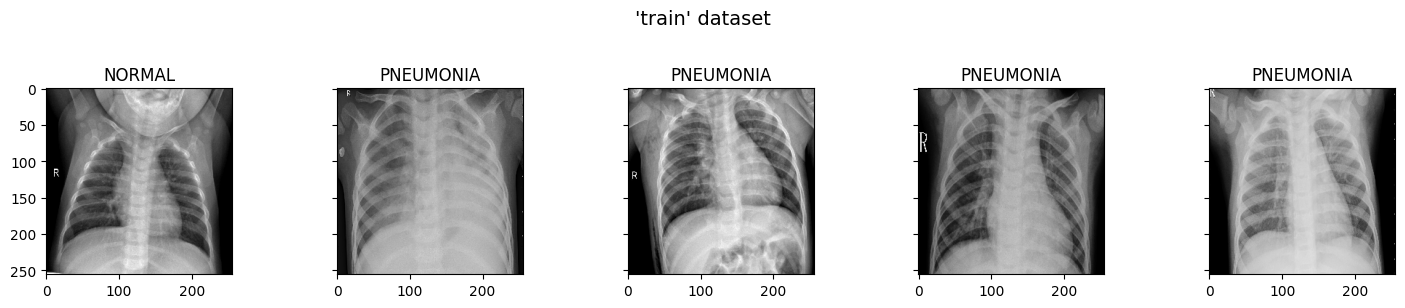

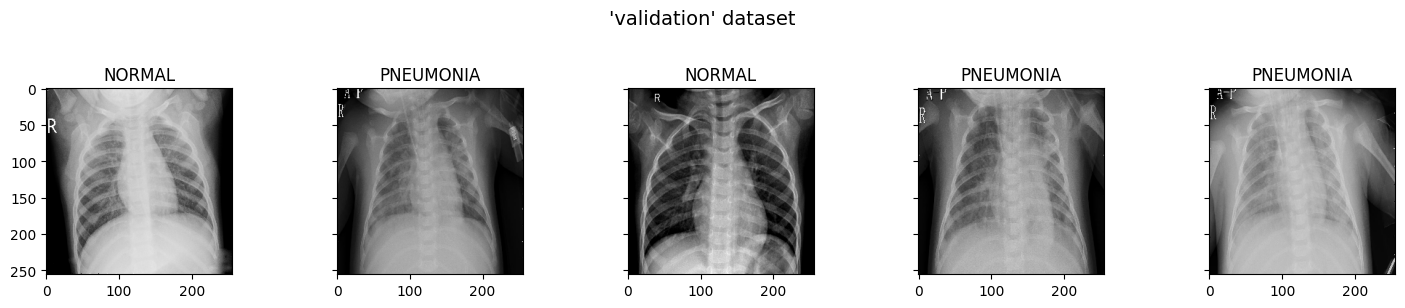

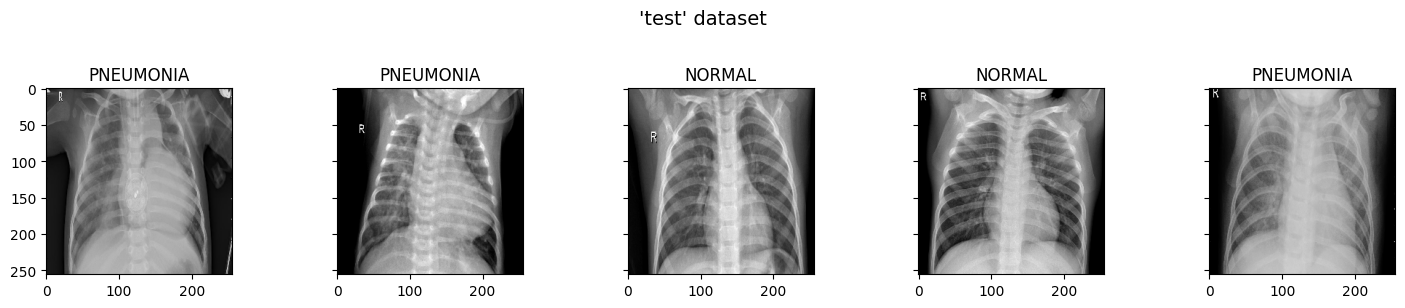

In [39]:
data_splitted = [
    {
        "data": train,
        "name": "train"
    },
        {
        "data": val,
        "name": "validation"
    },
            {
        "data": test,
        "name": "test"
    }
]
for data in data_splitted:
    show_sample_img(data['data'], data['name'])